### Load Neccessary python Libraries

In [1]:
#os.chdir('../scripts/')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from textblob import TextBlob
#import spacy 
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Add the scripts folder to the system path so we can import time_series.py
import sys
import os

# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))
import path

from load_data import CSVData
from Data_visulization import EDA
from financial import FinancialAnalysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Specter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Load Dataset 
df = pd.read_csv('C:\\Users\\Specter\\Documents\\Stoke_market_prediction_w1\\raw_analyst_ratings\\raw_analyst_ratings.csv')
df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1048570,1053768,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013 0:00,QLGC
1048571,1053769,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013 0:00,QLGC
1048572,1053770,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013 0:00,QLGC
1048573,1053771,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013 0:00,QLGC


In [6]:
# removing Unnamed column from the dataset
df= df.loc[:,~df.columns.str.contains("Unnamed")]

In [ ]:
df.info()

# Descriptive Statistics 
 # Obtaining basic statistics for textual lengths.

In [7]:
# Calculate headline length
df['headline_length'] = df['headline'].str.len()
df['headline_length']

0           39
1           42
2           29
3           44
4           87
          ... 
1048570     58
1048571    131
1048572    123
1048573     92
1048574     46
Name: headline_length, Length: 1048575, dtype: int64

In [8]:
# Descriptive statistics for headline length
headline_stats = df['headline_length'].describe().T
print("Descriptive Statistics for Headline Length:")
print(headline_stats)

Descriptive Statistics for Headline Length:
count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [9]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("\nTop Publishers and their Article Counts:")
print(publisher_counts)


Top Publishers and their Article Counts:
publisher
Paul Quintaro                 168435
Lisa Levin                    139785
Benzinga Newsdesk             111281
Charles Gross                  72892
Monica Gerson                  61374
                               ...  
Silvio Tavares                     1
Matthew Boesler                    1
Bull Market Bear                   1
vic@forextraininggroup.com         1
Ryan Smith                         1
Name: count, Length: 984, dtype: int64


In [18]:
# Analyze Publication Dates

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Drop rows with invalid or missing dates
df = df.dropna(subset=['date'])

# Group articles by publication date
daily_articles = df.groupby(df['date'].dt.date).size()

print(f"\nNumber of Articles Published by Date: {daily_articles}")


Number of Articles Published by Date: date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     18
2020-06-08    564
2020-06-09    581
2020-06-10    552
2020-06-11    302
Length: 2418, dtype: int64


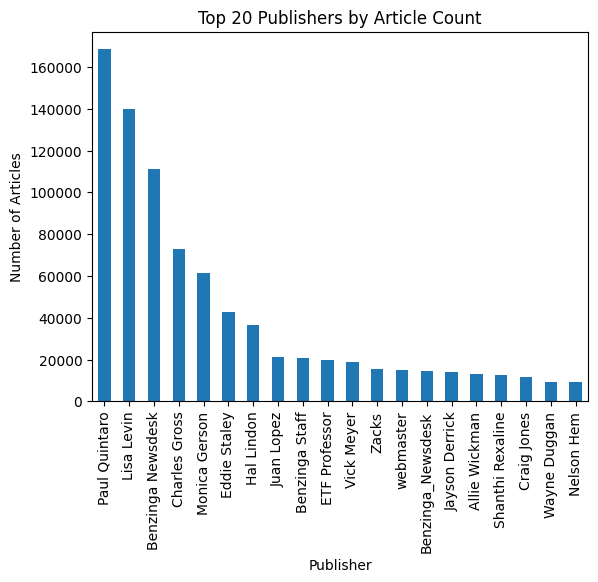

In [11]:
# Plot articles by publisher
publisher_counts.head(20).plot(kind='bar', title='Top 20 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [12]:
# Drop rows where 'date' is NaT and explicitly create a copy
df1 = df.dropna(subset=['date']).copy()

# Extract additional date components for analysis
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day

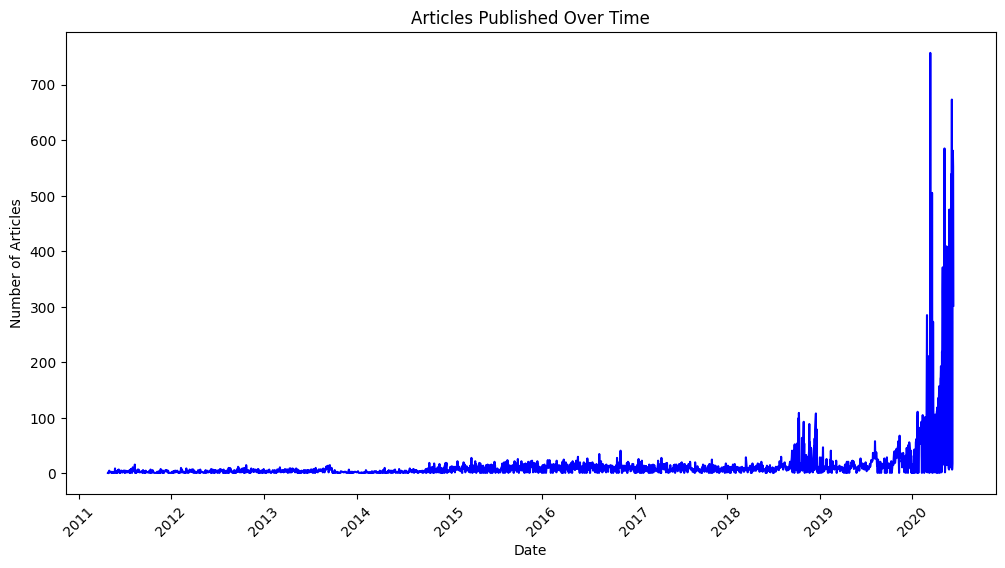

In [13]:
# Count the number of articles per day
daily_counts = df1['date'].dt.date.value_counts().sort_index()

# Plot the trend of articles over time
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='blue')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

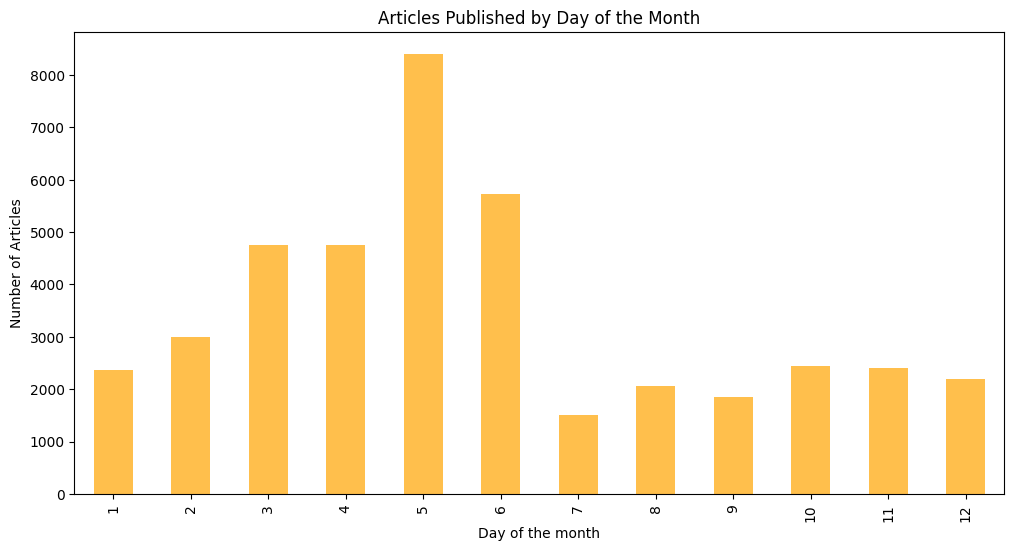

In [14]:
 # Count articles by day of the 'month'
monthly_counts = df1['month'].value_counts().sort_index()

# Plot the frequency of articles by day of the 'month'
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Articles Published by Day of the Month")
plt.xlabel("Day of the month")
plt.ylabel("Number of Articles")
plt.show()
      

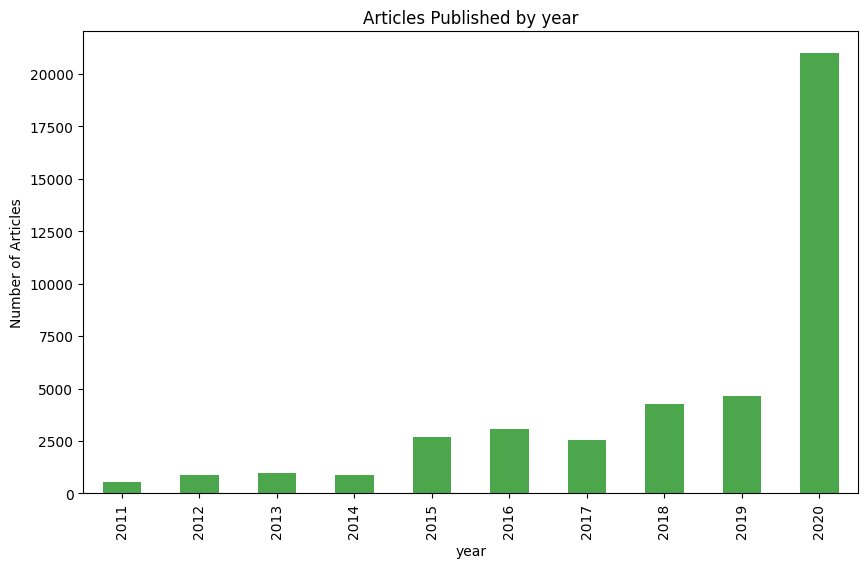

In [15]:
# Count articles by year
yearly_counts = df1['year'].value_counts().sort_index()

# Plot the frequency of articles by year
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title("Articles Published by year")
plt.xlabel("year")
plt.ylabel("Number of Articles")
plt.show()

# Sentiment Analysis
Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a piece of text. It categorizes the text into positive, negative, or neutral sentiments. This method is widely used for analyzing opinions in reviews, social media, news articles, and more.

In [16]:
# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['headline'].apply(get_sentiment)

# Count the number of articles for each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(f"\nSentiment Analysis Results: {sentiment_counts}")


Sentiment Analysis Results: sentiment
Neutral     694336
Positive    258964
Negative     95275
Name: count, dtype: int64


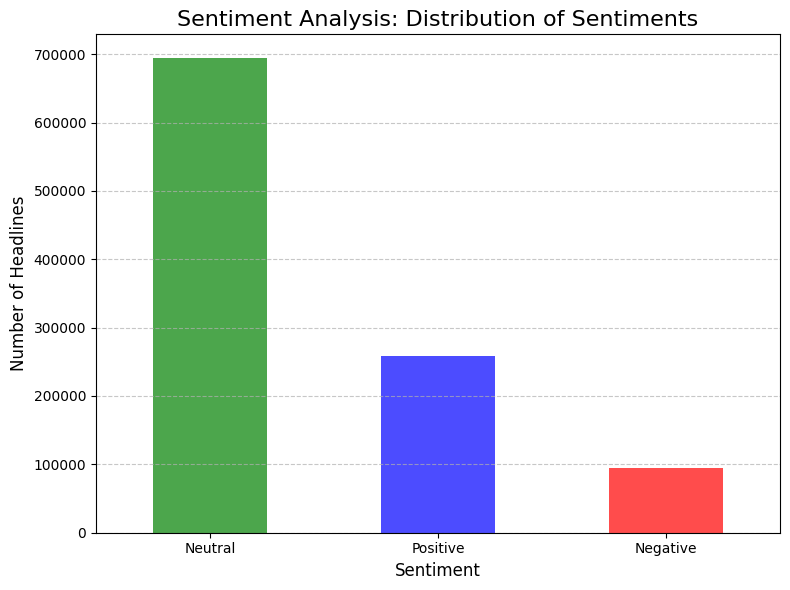

In [17]:
# Bar chart for sentiment analysis
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)

# Customize the plot
plt.title('Sentiment Analysis: Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Headlines', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    keywords = [word.lower() for word in tokens if word.is_alpha() and word.lower() not in stop_words]
    return keywords

# Apply the function to the 'headline' column
#df['keywords'] = df['headline'].apply(extract_keywords)

In [ ]:
# Count most common keywords
all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]
common_keywords = Counter(all_keywords).most_common(20)

# Print the top 20 keywords
print(f"\nTop 20 Keywords: {common_keywords}")


# Time Series Analysis:

In [ ]:
def analyze_publication_frequency(self, time_unit='D'):
        """ This function anlyzes how the publication frequency varies over time. The time can be, for daily,
        for weekly, for monthly, and for hourly frequency.
        """
        # Set 'date' as the index for time series analysis
        self.dataframe.set_index('date', inplace=True)

        # Resample by the specified time unit and count the number of articles published in each period
        publication_frequency = self.dataframe.resample(time_unit).size()

        # Plot the publication frequency over time
        plt.figure(figsize=(12, 6))
        publication_frequency.plot(kind='line', color='blue')
        plt.title(f"Publication Frequency Over Time ({time_unit})")
        plt.xlabel("Time")
        plt.ylabel("Number of Articles Published")
        plt.grid(True)
        plt.show()

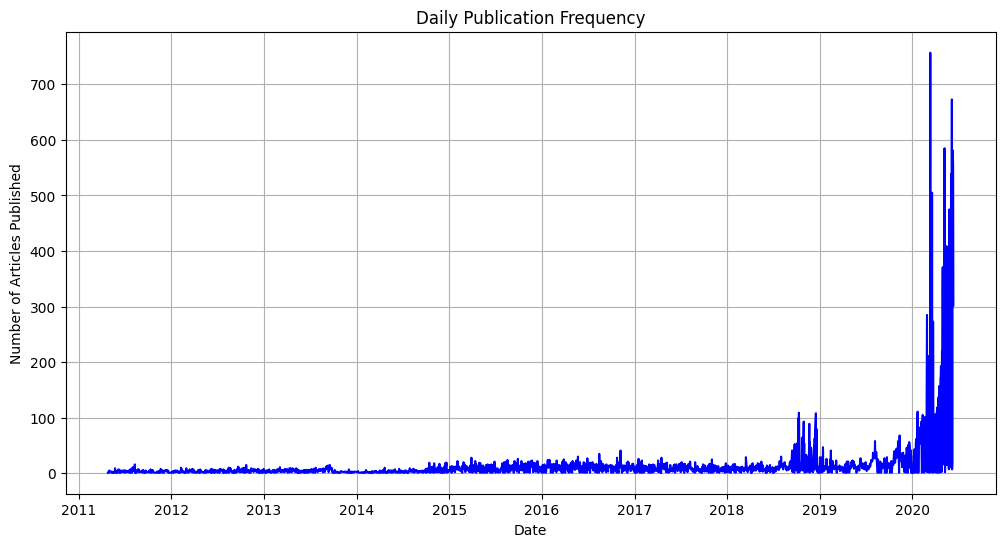

In [19]:
# 1. Analyze DAILY trends
# Extract the date (without time) and count articles published per day
df['publication_date'] = df['date'].dt.date
daily_trend = df.groupby('publication_date').size()

# Plot daily publication trends
plt.figure(figsize=(12, 6))
daily_trend.plot(kind='line', color='blue')
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()

C:\Users\Specter\AppData\Local\Temp\ipykernel_20020\1472947423.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')  # Format: YYYY-MM


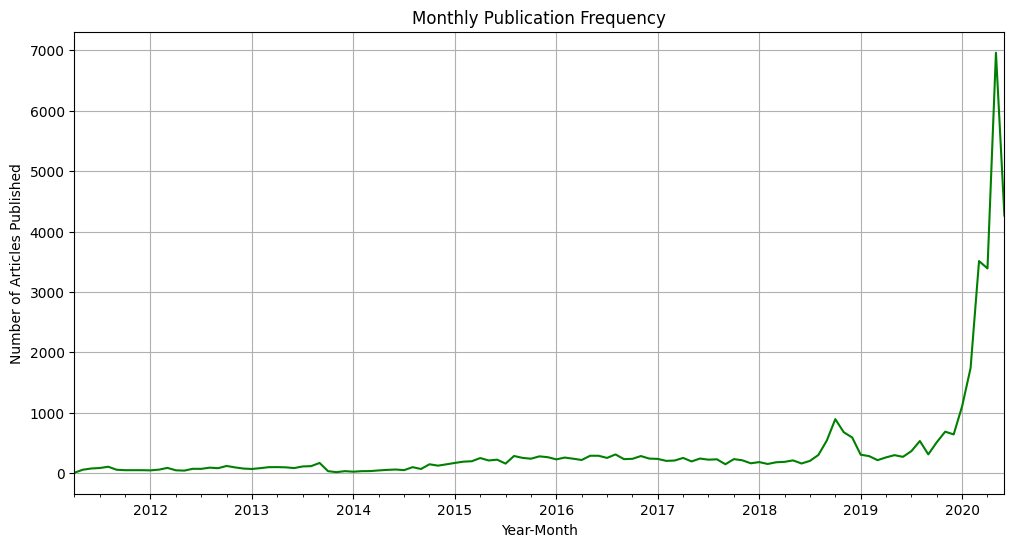

In [20]:
# 2. Analyze MONTHLY trends
# Group data by year and month, and count articles
df['year_month'] = df['date'].dt.to_period('M')  # Format: YYYY-MM
monthly_trend = df.groupby('year_month').size()

# Plot monthly publication trends
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', color='green')
plt.title('Monthly Publication Frequency')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()

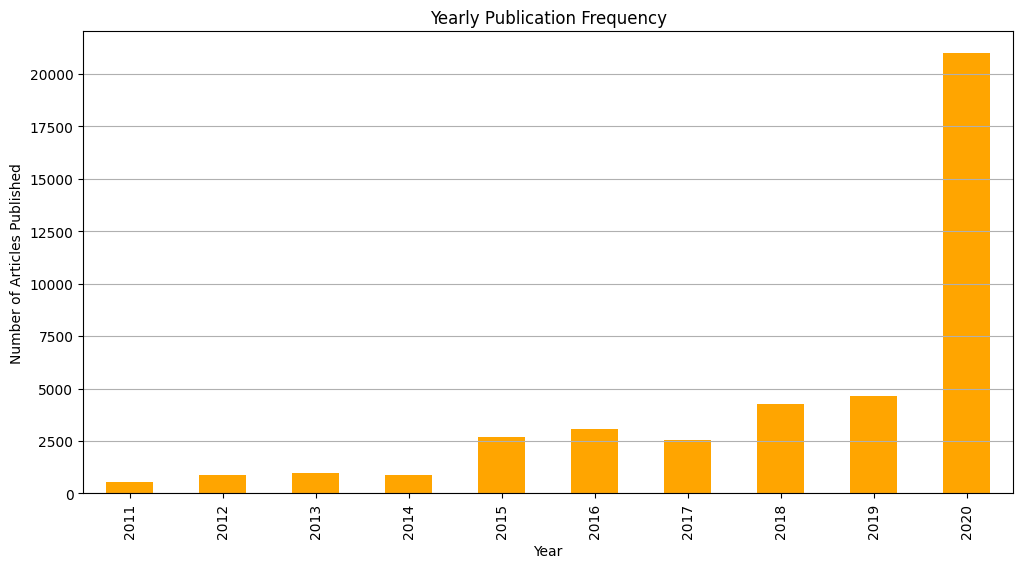

In [21]:
# 3. Analyze YEARLY trends
# Group data by year and count articles
df['year'] = df['date'].dt.year
yearly_trend = df.groupby('year').size()

# Plot yearly publication trends
plt.figure(figsize=(12, 6))
yearly_trend.plot(kind='bar', color='orange')
plt.title('Yearly Publication Frequency')
plt.xlabel('Year')
plt.ylabel('Number of Articles Published')
plt.grid(axis='y')
plt.show()

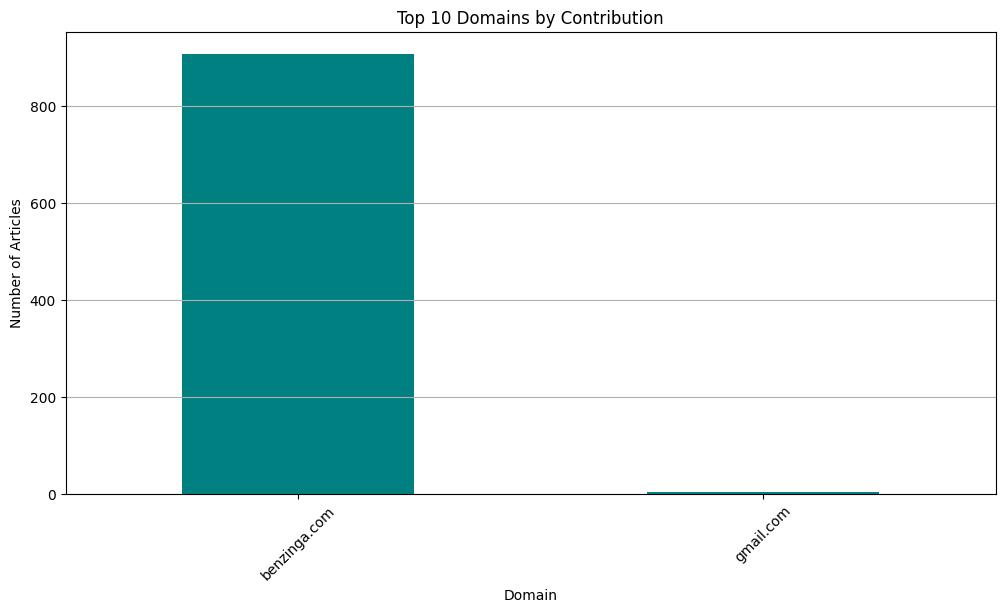

In [25]:
# Task 2: Identify unique domains if publishers contain email addresses
def extract_domain(publisher):
    if isinstance(publisher, str) and '@' in publisher:
        return publisher.split('@')[-1]
    return None

df['publisher_domain'] = df['publisher'].apply(extract_domain)
unique_domains = df['publisher_domain'].dropna().value_counts()

# Plot the top domains
plt.figure(figsize=(12, 6))
unique_domains.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Domains by Contribution')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Loading The Second Dataset on Stock market price

In [4]:
folder_path = path.get_path_price()

# Create an instance of CSVLoader
csv_loader = CSVData(folder_path)

# Load CSV files
csv_loader.load_data_files()

# Merge the loaded dataframes
merged_df = csv_loader.merge_dataframes()

# Display the first few rows
merged_df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [17]:
# Perform EDA for stock price
stock_price = EDA(merged_df)

In [18]:
# Basic Information and Structure of stoke price
stock_price.display_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB
None

Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Dataset Shape: (45428, 9)


In [19]:
stock_price.stat_summary()


Statistical Summary (Numerical Features):
               Open          High           Low         Close     Adj Close  \
count  45428.000000  45428.000000  45428.000000  45428.000000  45428.000000   
mean      46.798370     47.397792     46.190101     46.810590     45.367891   
std       78.259474     79.277620     77.218532     78.274673     78.049554   
min        0.034896      0.035547      0.033333      0.034115      0.031291   
25%        0.690500      0.708000      0.673541      0.693604      0.585204   
50%       13.646101     13.827710     13.463250     13.644750     13.076301   
75%       47.242501     47.720626     46.628125     47.193626     44.768961   
max      542.349976    542.809998    528.359985    539.909973    539.909973   

             Volume     Dividends  Stock Splits  
count  4.542800e+04  45428.000000  45428.000000  
mean   2.177785e+08      0.000847      0.002499  
std    3.076645e+08      0.022527      0.155291  
min    0.000000e+00      0.000000      0.0000

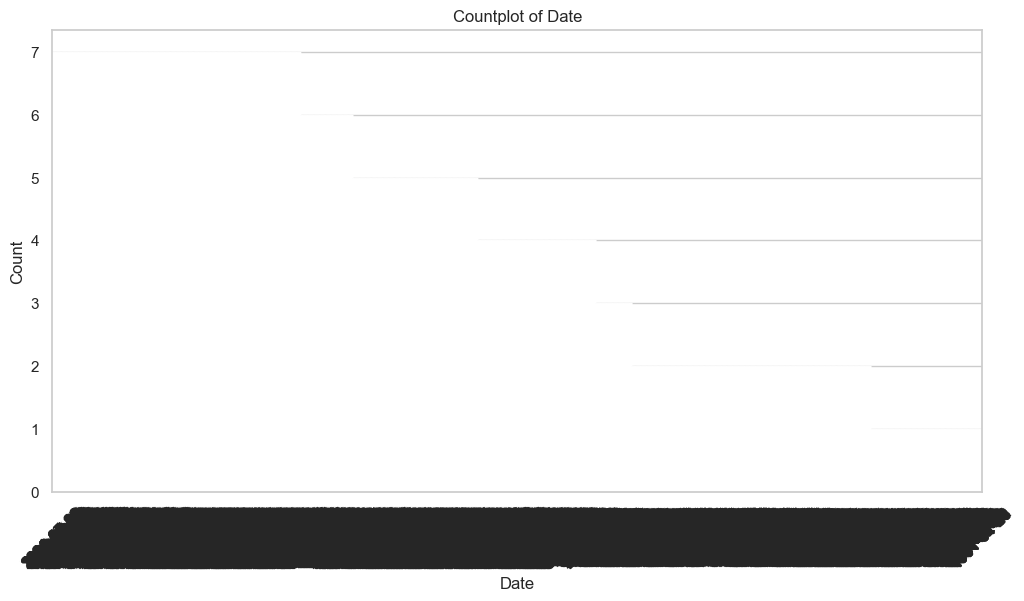

In [21]:
stock_price.univariate_cate()


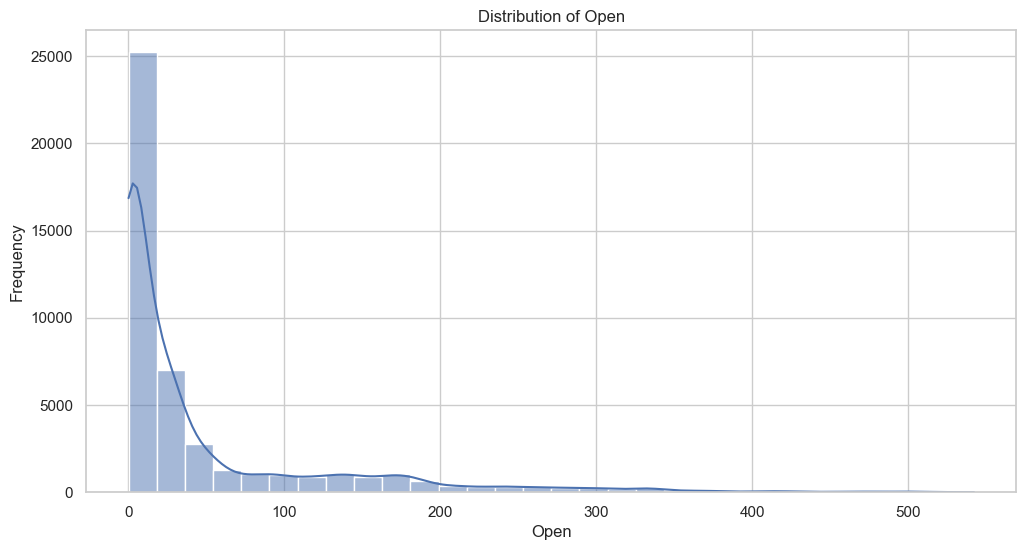

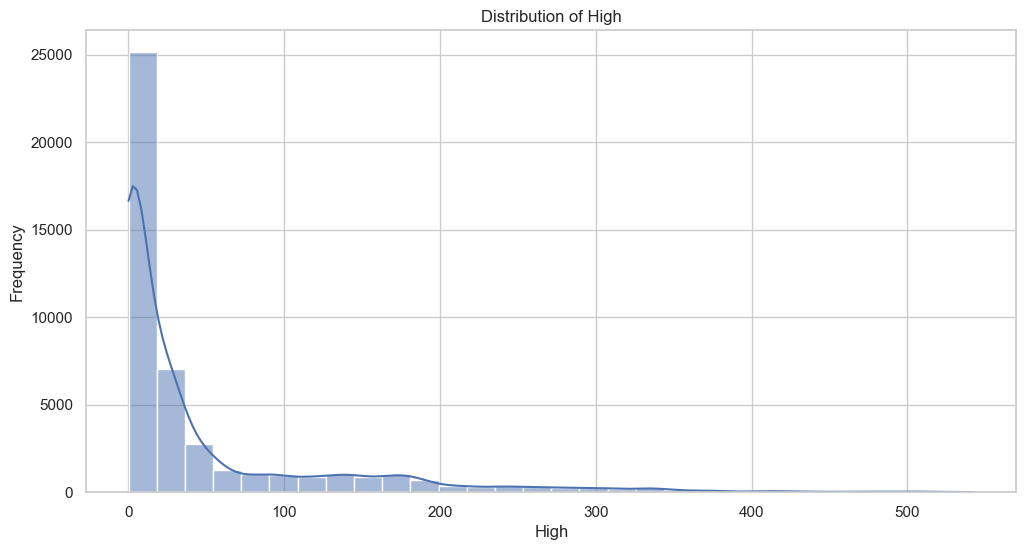

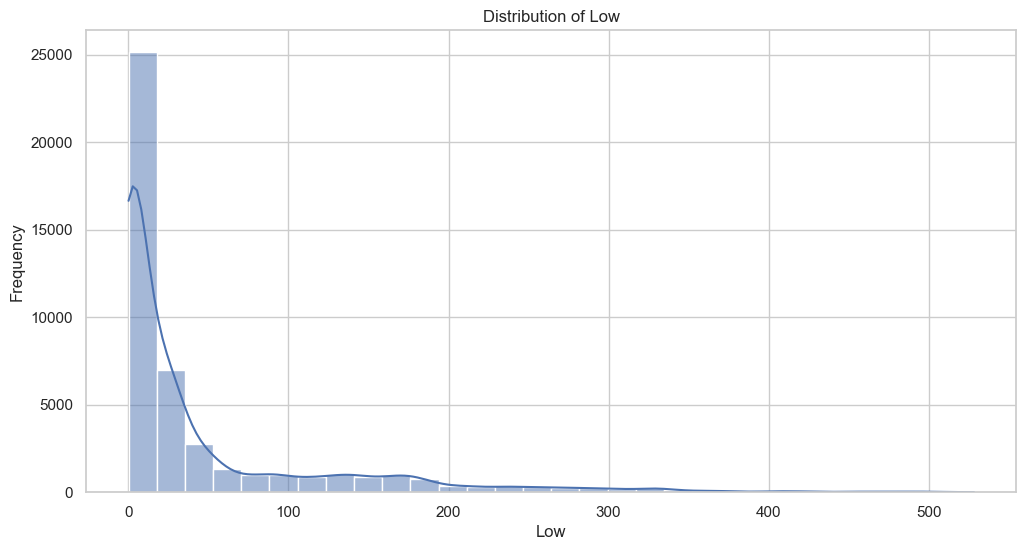

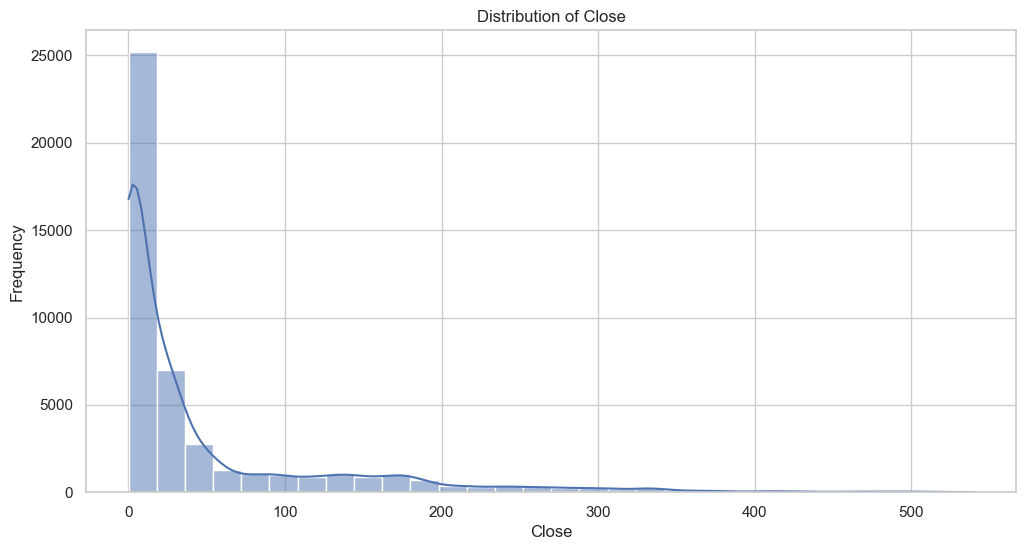

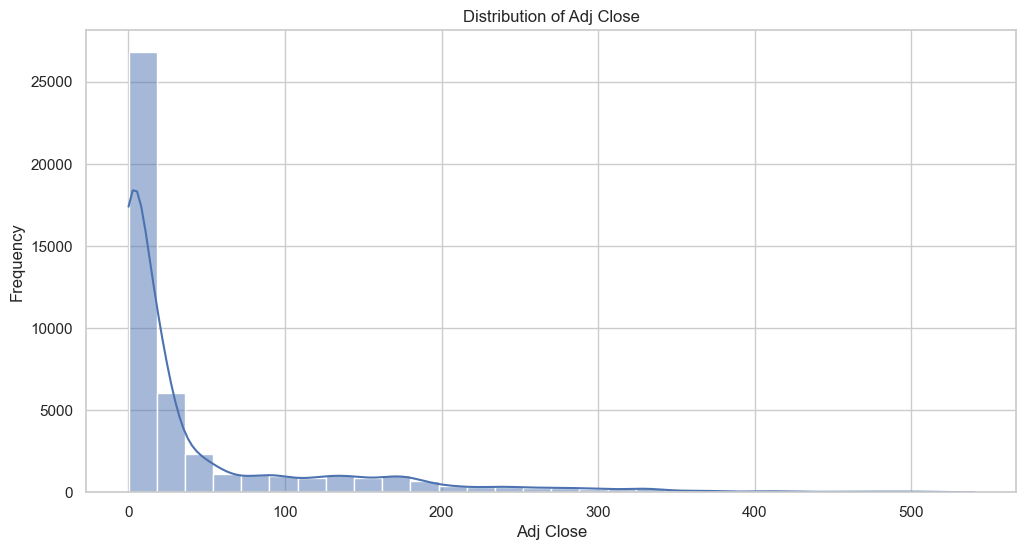

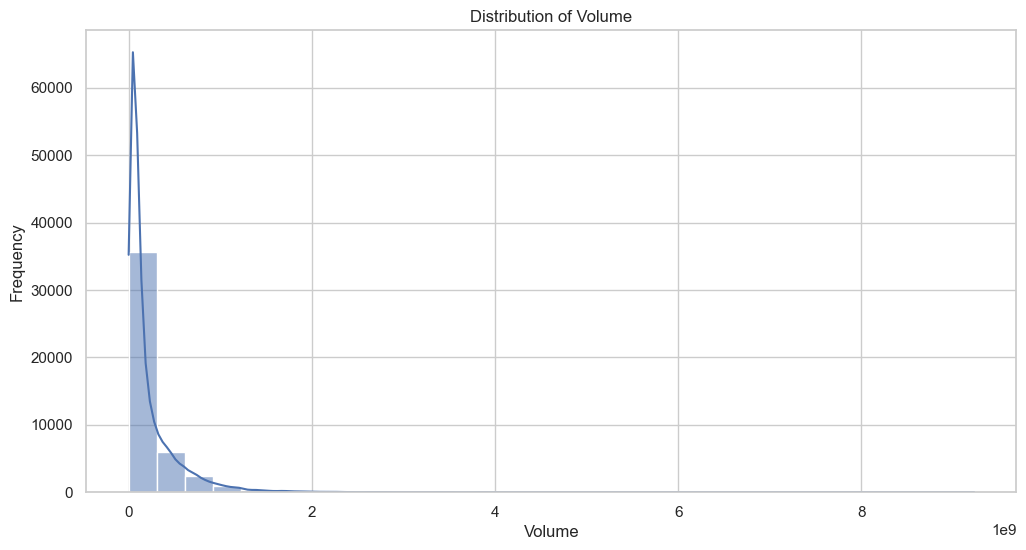

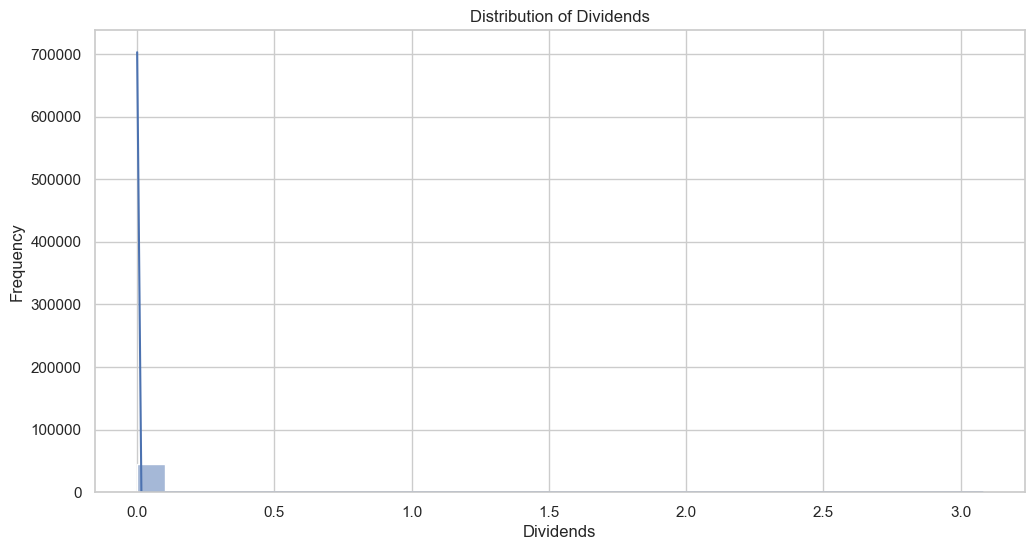

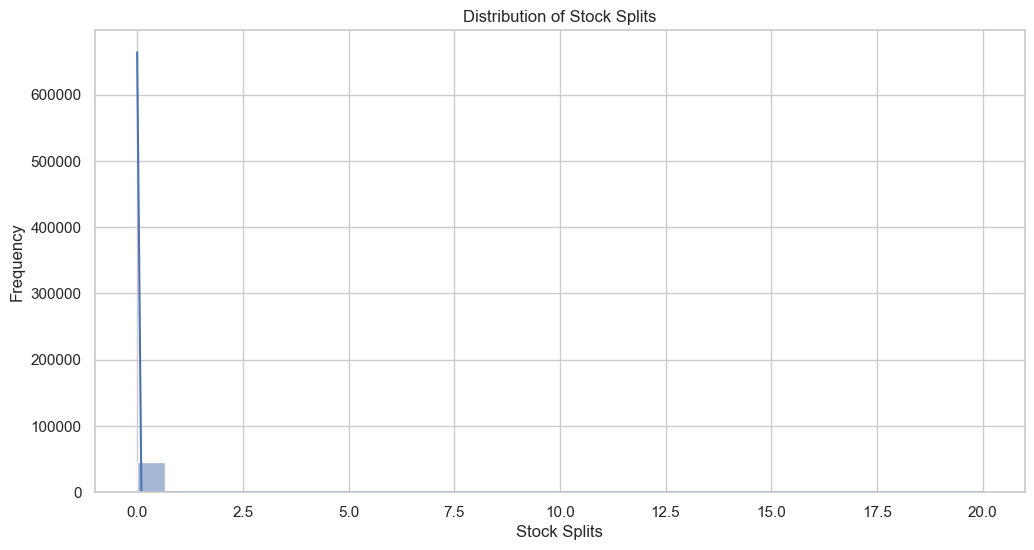

In [22]:
stock_price.univariate_num()

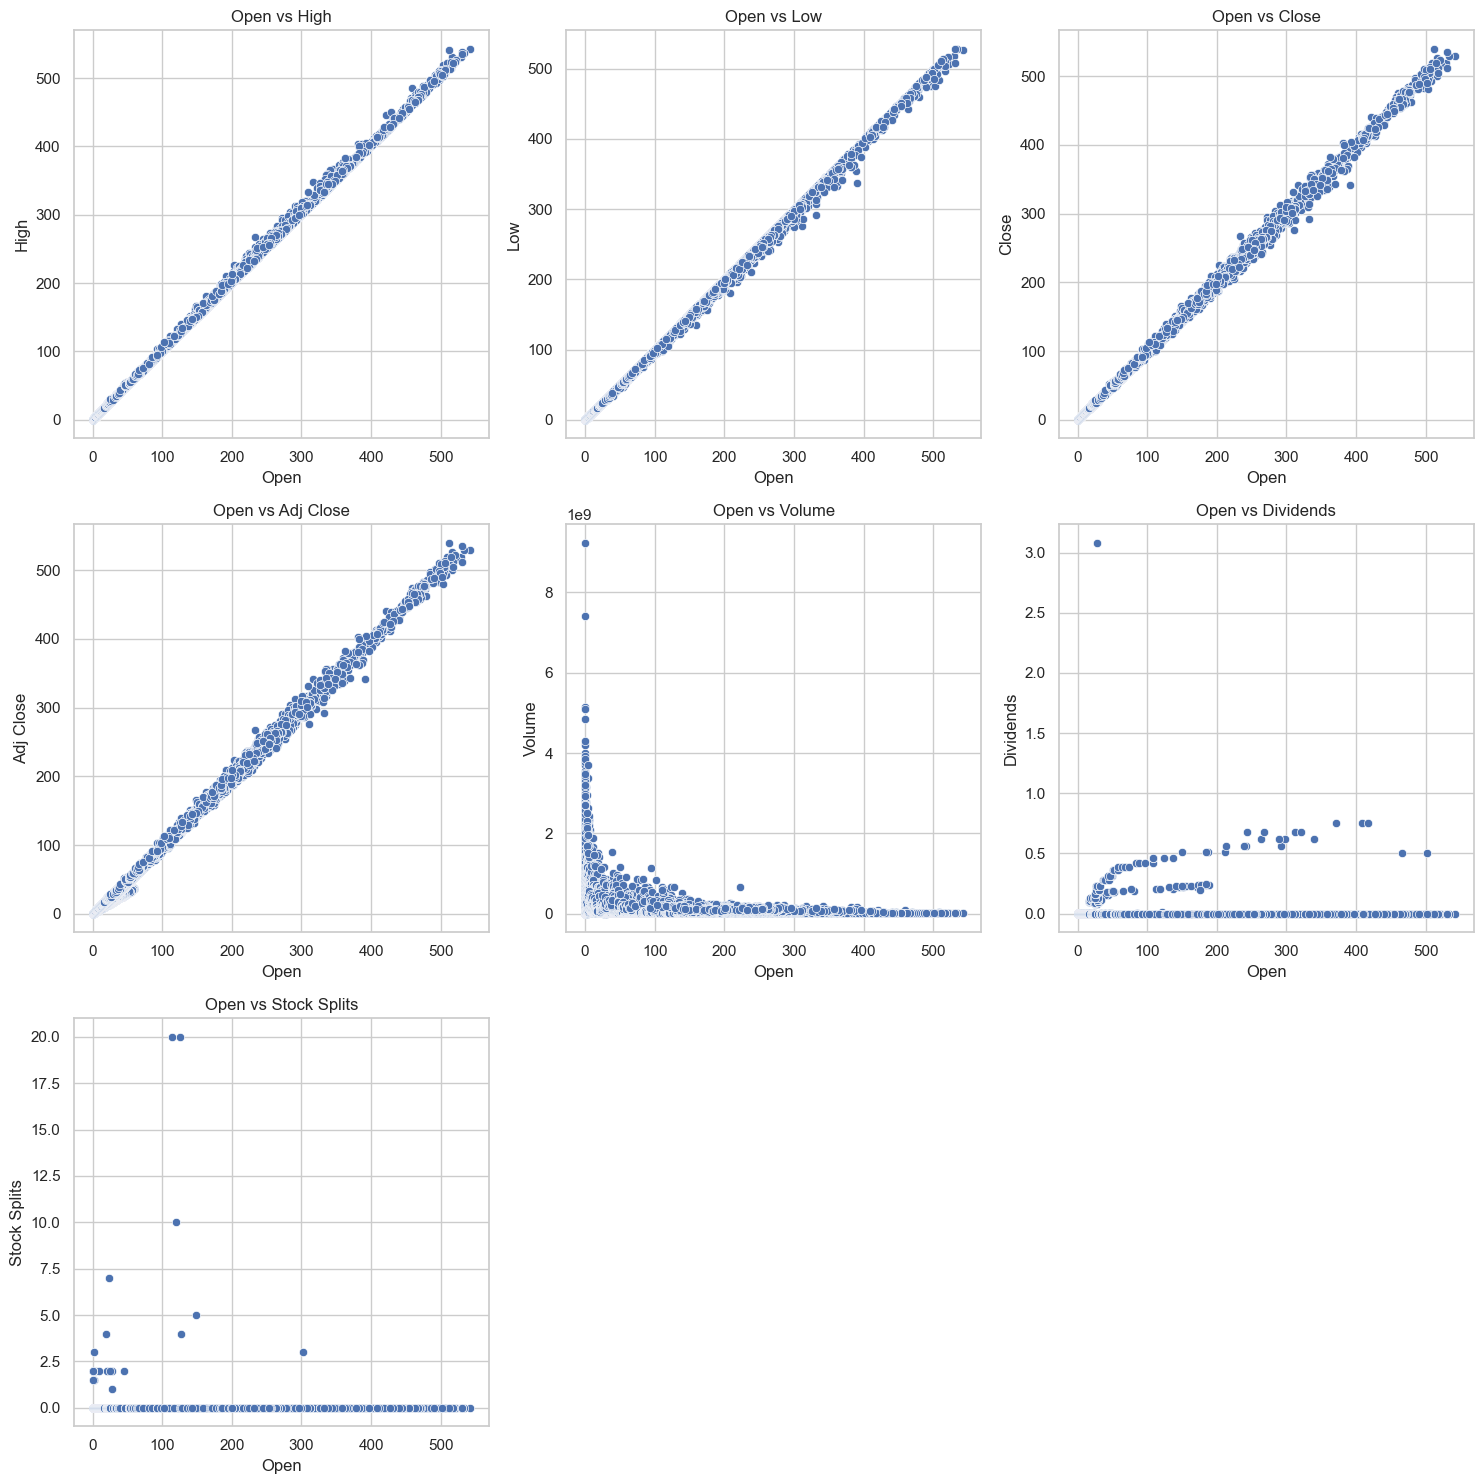

In [23]:
# Bivariate Analysis for Numerical vs Numerical (Scatterplots)
stock_price.bivariate_num()

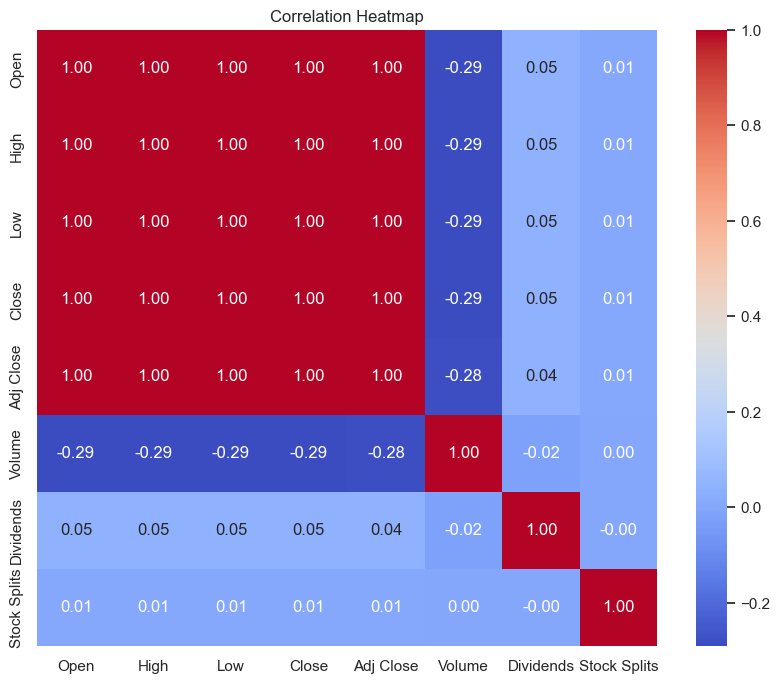

In [24]:
# Correlation Analysis Using Heatmap of Correlation Matrix
stock_price.correlation_analysis()

In [5]:
# Initialize the TimeSeries class with your dataframe
finan_data = FinancialAnalysis(merged_df)

In [6]:
finan_data.calculate_indicators()

# Print the results
print(finan_data.df.head(15))

          Date      Open      High       Low     Close  Adj Close     Volume  \
0   1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1   1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2   1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3   1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4   1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5   1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
6   1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   
7   1980-12-23  0.137835  0.138393  0.137835  0.137835   0.106257   46950400   
8   1980-12-24  0.145089  0.145647  0.145089  0.145089   0.111849   48003200   
9   1980-12-26  0.158482  0.159040  0.158482  0.158482   0.122173   55574400   
10  1980-12-29  0.160714  0.161272  0.160714  0.160714   0.123894   93161600   
11  1980-12-30  0.157366  0.157366  0.15

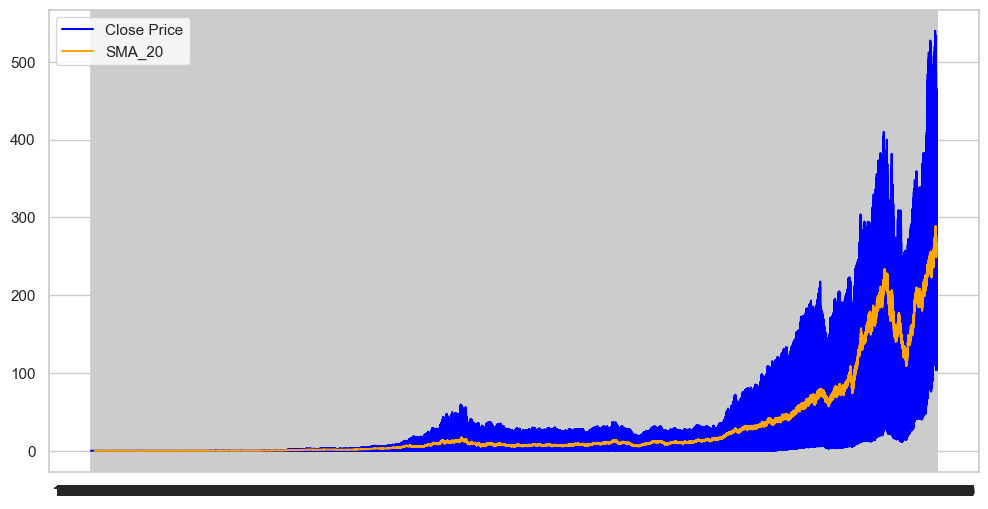

In [7]:
#SMA vs. Closing Price:
#Compare the SMA_20 with the Close price to identify trends.
finan_data.visualize_SMA()

RSI:
    Plot RSI to see overbought/oversold levels (usually RSI > 70 = overbought, RSI < 30 = oversold).

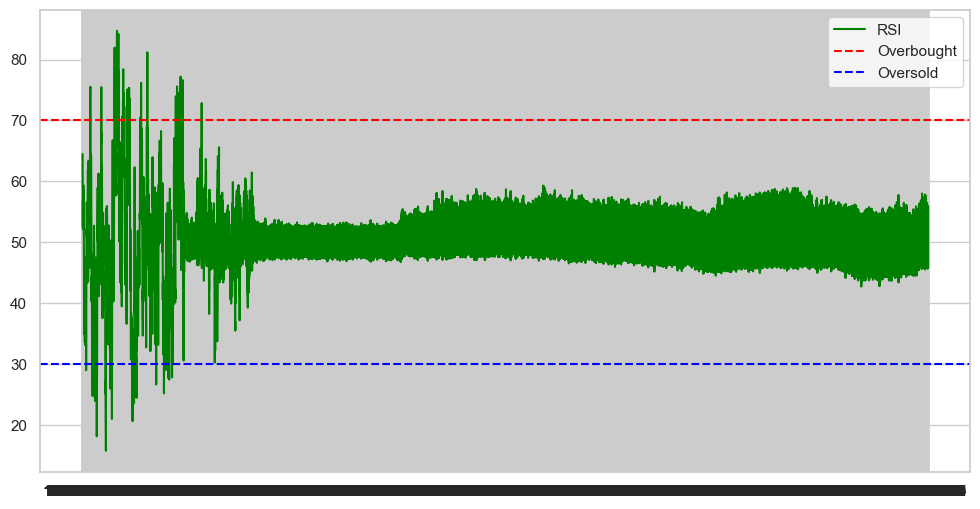

In [8]:
finan_data.visualize_RSI()

MACD:
    Plot MACD, signal line, and histogram to identify bullish/bearish momentum.

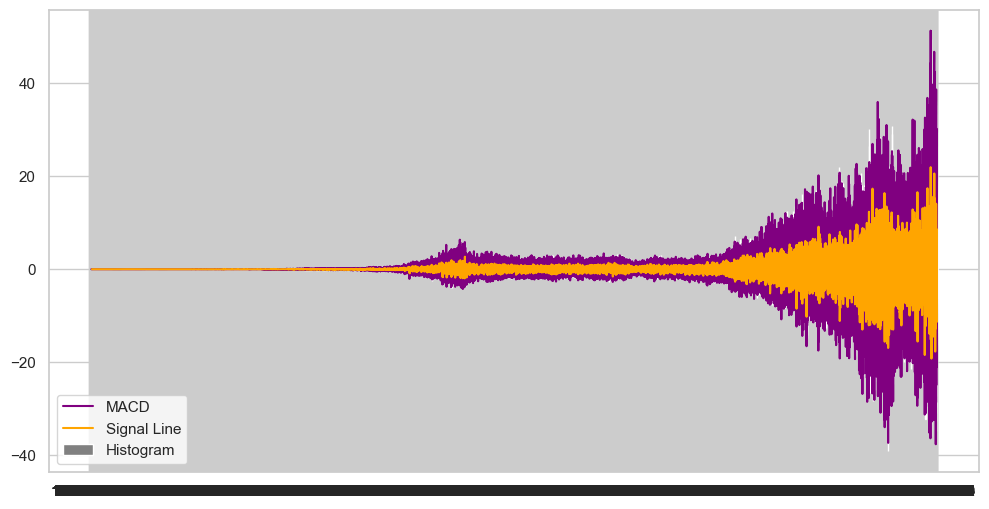

In [9]:
finan_data.visualize_MACD()